In [1]:
import pandas as pd
import pymysql
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np

warnings.filterwarnings("ignore")

db = pymysql.connect(host='localhost',port=3306,user='root',passwd='advait1010',db='chicagotaxidb')

def getRes(query):
	df = pd.read_sql(query, con=db)
	return df

In [2]:
#top 5 companies
all_companies = getRes('select Company from c_taxi')
top5 = all_companies['Company'].value_counts().index.tolist()[:5]
all_fares = []
all_dist = []
all_durs = []

new_top5 = ['TAS','NWM','CTA','DTA','CMM']

In [8]:
for i in range(5):
	name = "'" + top5[i] + "'"
	query1 = "select Fare from c_taxi where Company = " + name + ";"
	query2 = "select Trip_Miles from c_taxi where Company = " + "'" + top5[i] + "'" +";"
	query3 = "select Trip_Seconds from c_taxi where Company = " + "'" + top5[i] + "'" +";"
	all_fares.append((getRes(query1)))
	all_dist.append((getRes(query2)))
	all_durs.append((getRes(query3)))

In [9]:
fares = []
dist = []
durs = []

for i in range(5):
	fares.append(all_fares[i]['Fare'])
	dist.append(all_dist[i]['Trip_Miles'])
	durs.append(all_durs[i]['Trip_Seconds'])

In [10]:
#fares vs distances

mean_fares = [[] for i in range(5)]

for i in range(5):
	dists = [0,5,10,15,20,25,30,35,40,45,50]
	x = "'" + top5[i] + "'"
	for z in range(0,10):
		q = getRes("select Fare from c_taxi where Trip_Miles between "+str(dists[z])+" and "+str(dists[z+1])+" and Company = "+x+";")
		if len(q) != 0:
			mean_fares[i].append(sum(q['Fare'])/len(q))
		else:
			mean_fares[i].append(0)	

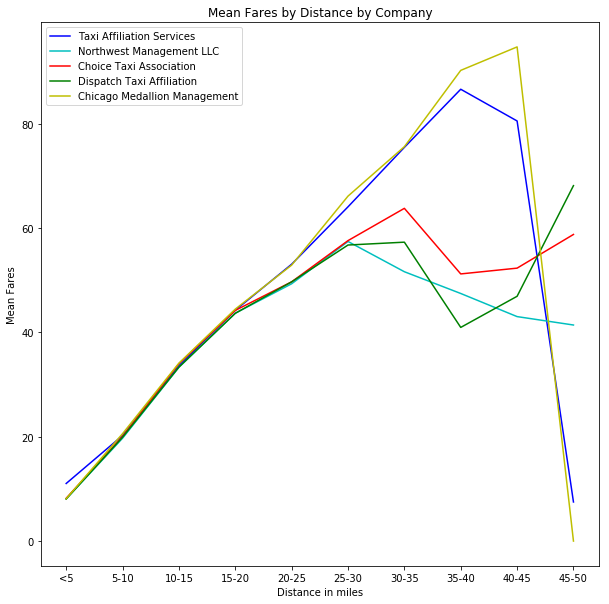

In [11]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Distance in miles')
plt.ylabel('Mean Fares')
plt.title('Mean Fares by Distance by Company')
plt.legend()

In [12]:
#mean rates


mean_rates = [[] for i in range(5)]

for i in range(5):
	dists = [0,5,10,15,20,25,30,35,40,45,50]
	x = "'" + top5[i] + "'"
	for z in range(0,10):
		q = getRes("select Fare,Trip_Miles from c_taxi where Trip_Miles between "+str(dists[z])+" and "+str(dists[z+1])+" and Company = "+x+";")
		if len(q) != 0:
			mean_rates[i].append(sum(q['Fare'])/sum(q['Trip_Miles']))
		else:
			mean_rates[i].append(0)	

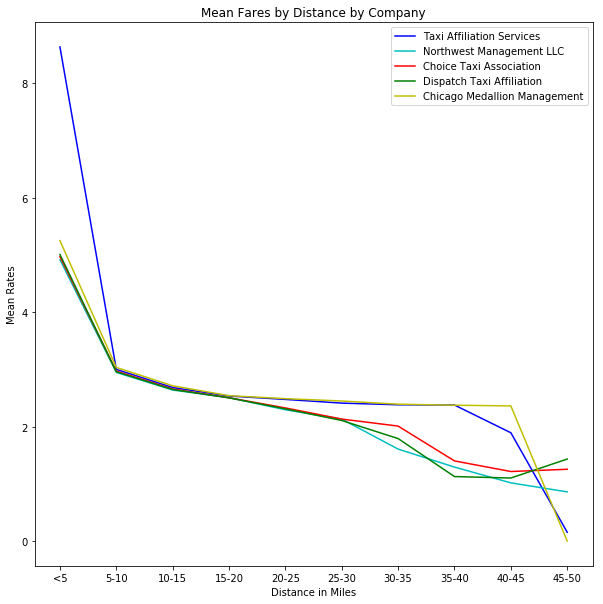

In [16]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_rates[0],label = top5[0],color = 'b')
plt.plot(x,mean_rates[1],label = top5[1],color = 'c')
plt.plot(x,mean_rates[2],label = top5[2],color = 'r')
plt.plot(x,mean_rates[3],label = top5[3],color = 'g')
plt.plot(x,mean_rates[4],label = top5[4],color = 'y')
plt.xlabel('Distance in Miles')
plt.ylabel('Mean Rates')
plt.title('Mean Rates by Distance by Company')
plt.legend()

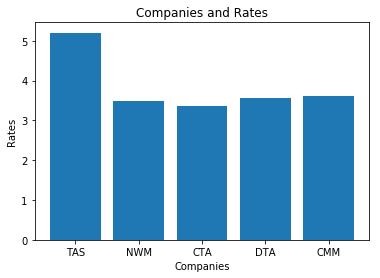

In [15]:
#rates

rate0 = sum(fares[0])/sum(dist[0])
rate1 = sum(fares[1])/sum(dist[1])
rate2 = sum(fares[2])/sum(dist[2])
rate3 = sum(fares[3])/sum(dist[3])
rate4 = sum(fares[4])/sum(dist[4])
all_rates = [rate0,rate1,rate2,rate3,rate4]

g = plt.figure(1)
z = [i for i in range(5)]
plt.xticks(z,new_top5)
plt.bar(z,all_rates)
plt.xlabel('Companies')
plt.ylabel('Rates')
plt.title('Companies and Rates')
plt.legend()
g.show()

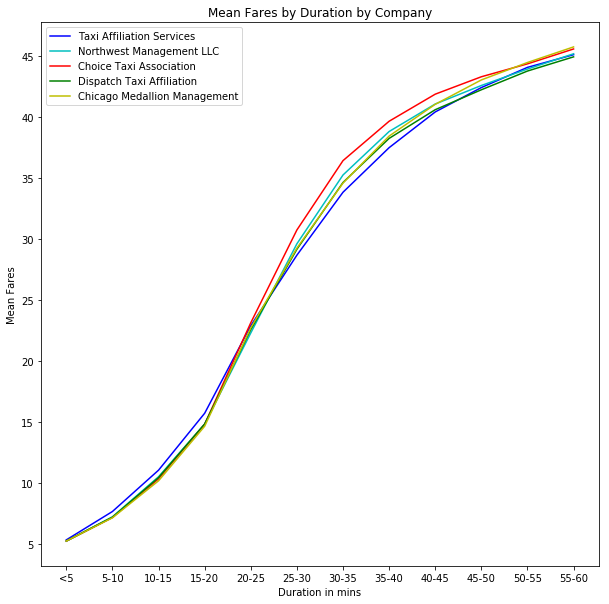

In [17]:
mean_fares = [[] for i in range(5)]

for i in range(5):
	times = [300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,3600]
	x = "'" + top5[i] + "'"
	q = getRes("select Fare from c_taxi where Trip_Seconds <= 300 and Company = " + x +";")
	mean_fares[i].append(sum(q['Fare'])/len(q))



	for z in range(0,11):
		q = getRes("select Fare from c_taxi where Trip_Seconds between "+str(times[z])+" and "+str(times[z+1])+" and Company = "+x+";")
		mean_fares[i].append(sum(q['Fare'])/len(q))

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Duration in mins')
plt.ylabel('Mean Fares')
plt.title('Mean Fares by Duration by Company')
plt.legend()

In [18]:
mean_fares = [[] for i in range(5)]

for i in range(5):
	times = [300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,3600]
	x = "'" + top5[i] + "'"
	q = getRes("select Fare,Trip_Miles from c_taxi where Trip_Seconds <= 300 and Company = " + x +";")
	mean_fares[i].append(sum(q['Fare'])/sum(q['Trip_Miles']))



	for z in range(0,11):
		q = getRes("select Fare, Trip_Miles from c_taxi where Trip_Seconds between "+str(times[z])+" and "+str(times[z+1])+" and Company = "+x+";")
		mean_fares[i].append(sum(q['Fare'])/sum(q['Trip_Miles']))

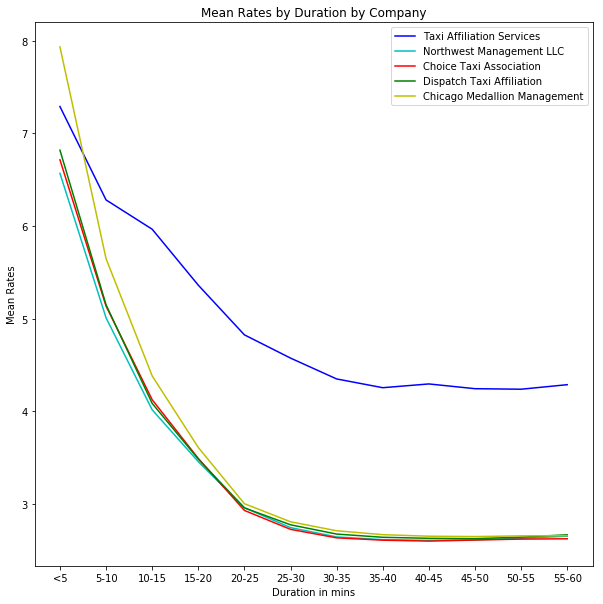

In [19]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Duration in mins')
plt.ylabel('Mean Rates')
plt.title('Mean Rates by Duration by Company')
plt.legend()

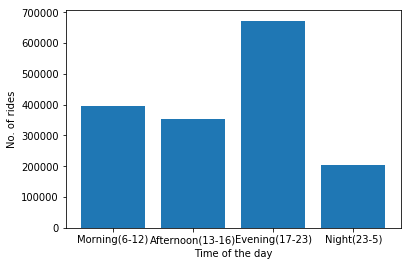

In [20]:
all_times = getRes("select Trip_Start_Timestamp from c_taxi")

m = [i for i in range(6,13)]
a = [i for i in range(13,17)]
e = [i for i in range(17,24)]
n = [i for i in range(0,6)]

all_ctrs = [0,0,0,0]


for i in range(len(all_times)):
	z = datetime.datetime.strptime(all_times['Trip_Start_Timestamp'].iloc[i],"%Y-%m-%d %H:%M:%S").hour
	if z in m:	
		all_ctrs[0] += 1
	
	elif z in a:
		all_ctrs[1] += 1

	elif z in e:
		all_ctrs[2] += 1

	else:
		all_ctrs[3] += 1

x = np.array([0,1,2,3])
my_xticks = ['Morning(6-12)','Afternoon(13-16)','Evening(17-23)','Night(23-5)']
plt.xticks(x, my_xticks)
plt.bar(x, all_ctrs)
plt.xlabel('Time of the day')
plt.ylabel('No. of rides')
plt.show()